In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
import random

In [2]:
x,_=make_blobs(centers=4,random_state=42)

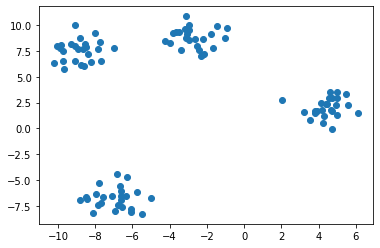

In [3]:
plt.scatter(x[:,0],x[:,1])

In [75]:
class Cluster:
    
    def __init__(self,center,name):
        self.name=name
        self.center=center
        self.points=[]
        
    def distance(self,point):
        return np.sqrt(np.sum((self.center-point)**2))
    
    def relocate(self):
        self.center=np.mean(self.points,axis=0)
        self.points.clear()
        
class custom:
    def __init__(self,max_iters=20,n_clusters=3):
        self.max_iters=max_iters
        self.n_clusters=n_clusters
        
    def fit(self,X):
        clusters=[]
        for i in range(self.n_clusters):
            cluster=Cluster(center=random.choice(X),name=i)
            clusters.append(cluster)
        
        errors=[]
        for it in range(self.max_iters):
            
            labels=[]
            
            for point in X:
                
                distances=[]
                
                for cluster in clusters:
                    distance=cluster.distance(point)
                    distances.append((distance,cluster.name))
                    
                distance , cluster_name=sorted(distances)[0]
                
                labels.append(cluster_name)
                
                
                cluster=clusters[cluster_name]
                cluster.points.append(point)
                
        err=self.error(labels,clusters,X)
        errors.append(err)
        
        for cluster in clusters:
            cluster.relocate()
            
        self.labels_=labels
        self.centers_=[cluster.center for cluster in clusters]
        
        return (errors) 
        
    def error(self, labels, clusters, X):
        
        er = 0
        for point, label in zip(X, labels):
            cluster = clusters[label]
            er += cluster.distance(point)
        
        return er / len(X)

In [76]:
a=custom()

In [77]:
err=a.fit(x)

In [78]:
a.centers_

[array([-5.77644235,  8.14575097]),
 array([4.44441765, 2.02122148]),
 array([-6.9749469 , -6.76471966])]

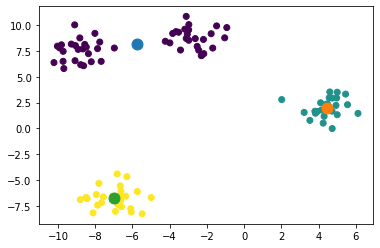

In [79]:
plt.scatter(x[:, 0], x[:, 1], c=a.labels_)

for center in a.centers_:
    plt.scatter(center[0], center[1], s=120)

In [80]:
#a.labels_

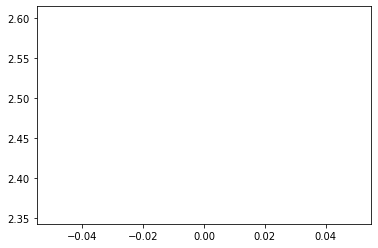

In [81]:
plt.plot(err)